In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [6]:
beerData = pd.read_csv('AusBeerProduction.csv', names = ['month', 'beerProduction'], header=0)
beerData.head()

,month,beerProduction
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [7]:
def countNan(dataset):
    for col in dataset.columns.tolist():
        naCount = sum(pd.isna(dataset[col]))
        print(str(col) + ": " + str(naCount))

countNan(beerData)

month: 0
beerProduction: 0


In [8]:
beerData.shape

(476, 2)

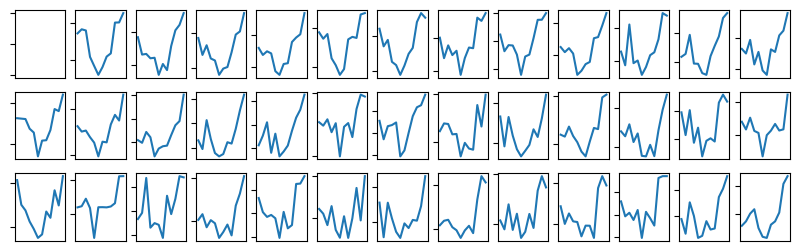

In [9]:
j=0
fig, axs = plt.subplots(3, 13, figsize=(10, 3))
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.plot(beerData.month[j:i*12], beerData.beerProduction[j:i*12])
    j = i*12
    ax.set_xticks([])  
    ax.set_xticks([])  
    ax.set_xticklabels([])  
    ax.set_yticklabels([])
plt.show()

#Due to approximation, not all data at the end is plotted.....

Auto regressive model

In [10]:
ar_model = sm.tsa.AutoReg(beerData.beerProduction[0:452], lags=15)
ar_result = ar_model.fit() 
forecast = ar_result.predict(start=len(beerData.beerProduction)-11, end=len(beerData.beerProduction))

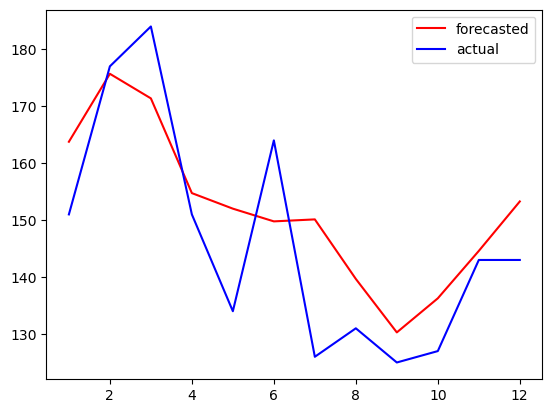

In [11]:
plt.plot(list(range(1, 13)), forecast, color='red', label='forecasted')
plt.plot(list(range(1,13)), beerData.beerProduction[453:465], color='blue', label='actual')
plt.legend()
plt.show()

/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


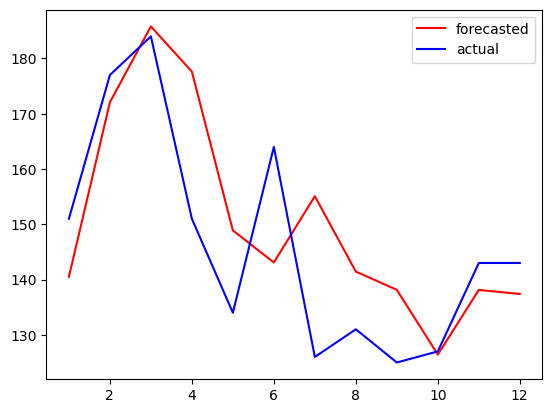

In [40]:
model = ARIMA(beerData.beerProduction[0:452], order=(15, 0, 10))  
fit_model = model.fit()

forecast = fit_model.forecast(steps=12)  
plt.plot(list(range(1, 13)), forecast, color='red', label='forecasted')
plt.plot(list(range(1,13)), beerData.beerProduction[453:465], color='blue', label='actual')
plt.legend()
plt.show()

In [22]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         beerProduction   No. Observations:                  452
Model:               ARIMA(10, 1, 10)   Log Likelihood               -1679.243
Date:                Sun, 24 Mar 2024   AIC                           3400.485
Time:                        01:21:00   BIC                           3486.826
Sample:                             0   HQIC                          3434.512
                                - 452                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.057     -0.765      0.444      -0.156       0.069
ar.L2         -0.6074      0.053    -11.479      0.000      -0.711      -0.504
ar.L3         -0.1897      0.045     -4.223      0.000      -0.278      -0.102
ar.L4         -0.8366      0.040    -20.889      0.000      -0.915      -0.758
ar.L5          0.0151      0.049      0.308      0.758      -0.081       0.111
ar.L6         -0.8125      0.039    -20.666      0.000      -0.890      -0.735
ar.L7         -0.0542      0.049     -1.117      0.264      -0.149       0.041
ar.L8         -0.7781      0.045    -17.157      0.000      -0.867      -0.689
ar.L9         -0.1793      0.055     -3.241      0.001      -0.288      -0.071
ar.L10        -0.6489      0.043    -15.124      0.000      -0.733      -0.565
ma.L1         -0.9061      0.080    -11.369      0.000      -1.062      -0.750
ma.L2          0.3525      0.110      3.191      0.001       0.136       0.569
ma.L3         -0.0718      0.095     -0.756      0.449      -0.258       0.114
ma.L4          0.4496      0.084      5.343      0.000       0.285       0.615
ma.L5         -0.5277      0.076     -6.917      0.000      -0.677      -0.378
ma.L6          0.4629      0.085      5.463      0.000       0.297       0.629
ma.L7         -0.4467      0.085     -5.263      0.000      -0.613      -0.280
ma.L8          0.7532      0.091      8.302      0.000       0.575       0.931
ma.L9         -0.3707      0.102     -3.646      0.000      -0.570      -0.171
ma.L10         0.0534      0.068      0.784      0.433      -0.080       0.187
sigma2       101.7235      6.254     16.266      0.000      89.466     113.981
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                29.87
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               3.81   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""